In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ad = pd.read_csv('advertising.csv')

In [3]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
ad.describe([0.95,0.99])

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
50%,149.750000,22.900000,25.750000,16.000000
95%,280.735000,46.810000,71.825000,23.800000
99%,292.907000,49.400000,89.515000,25.507000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

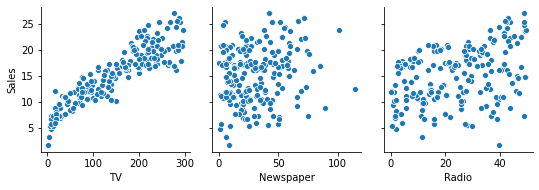

In [15]:
sns.pairplot(y_vars='Sales',x_vars=['TV', 'Newspaper', 'Radio'],data=ad)

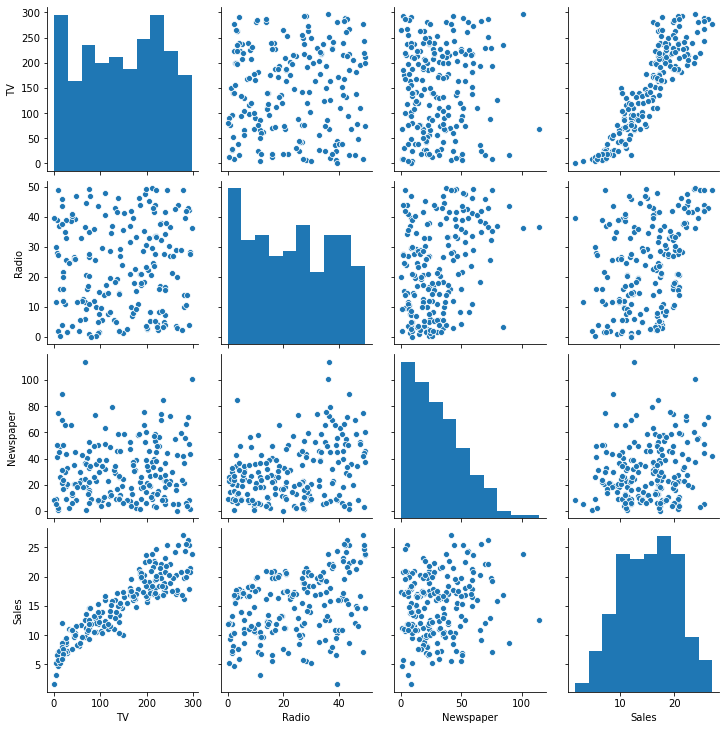

In [16]:
sns.pairplot(ad)

In [17]:
X = ad['TV']
y = ad['Sales']

In [21]:
import sklearn
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,train_size=0.7)

In [24]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [25]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [26]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [27]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [28]:
X_train.shape

(140,)

In [29]:
X_test.shape

(60,)

In [30]:
y_train.shape

(140,)

In [32]:
y_test.shape

(60,)

In [33]:
import statsmodels.api as sm

In [34]:
X_train_sm = sm.add_constant(X_train)

In [35]:
lr = sm.OLS(y_train,X_train_sm)

In [36]:
lr_model=lr.fit()

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.52e-52
Time:                        13:45:35   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

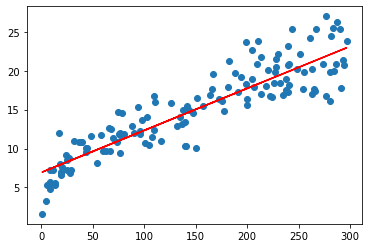

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.94+0.054*X_train,'r')

In [43]:
y_train_pred = lr_model.predict(X_train_sm)

In [44]:
res = y_train - y_train_pred

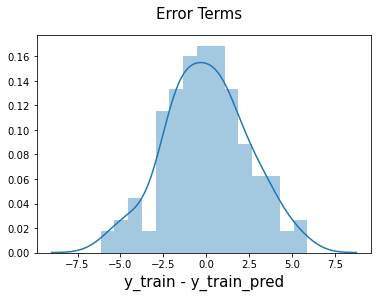

In [48]:
sns.distplot(res,bins=15)
plt.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [49]:
#The residuals are following the normally distributed with a mean 0. All good!

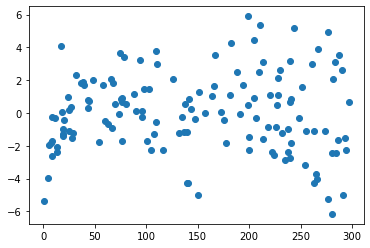

In [50]:
# patterns in residuals

plt.scatter(X_train,res)

In [51]:
X_test_sm = sm.add_constant(X_test)

In [52]:
y_test_pred = lr_model.predict(X_test_sm)

In [54]:
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

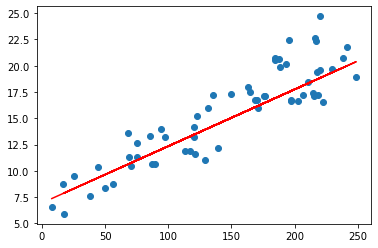

In [55]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.94+0.054*X_test,'r')

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

2.019296008966233

In [58]:
r_squared = r2_score(y_test,y_test_pred)

In [59]:
r_squared

0.7921031601245658